In [1]:
import pandas as pd
from scipy import stats
import wrangle as acq
import env
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from termcolor import colored
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

from io import StringIO

In [2]:
# Upload dataset
#Dropped all null values from df

df = acq.prep_telco()
df = df.dropna()

csv file found and loaded


In [3]:
#Split dataset into two components

X = df.drop(columns= 'churn_Yes')
Y = df.churn_Yes

#converted X and Y components into DataFrames

X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

#split components into train, validate, and test
X_train, X_validate, X_test, y_train, y_validate, y_test = acq.train_validate_test_split(X, Y)

In [4]:
#converted train, validate, and test sets into DataFrames
X_train = pd.DataFrame(X_train)
X_validate = pd.DataFrame(X_validate)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

In [5]:
#Found out how data is split between yes and no for churn
y_train.value_counts()

churn_Yes
0            3104
1            1121
dtype: int64

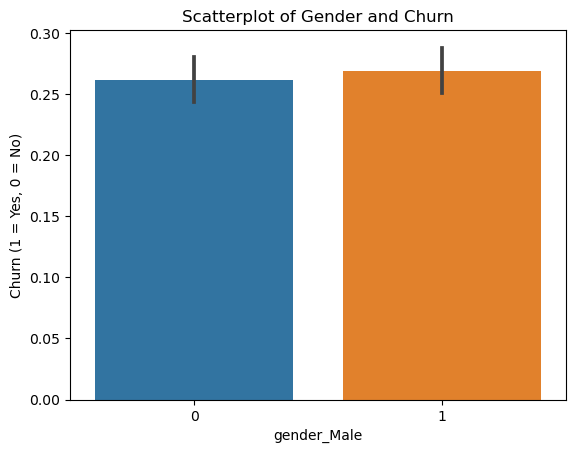

In [6]:
#Does gender affect churn?

sns.barplot(x = X_train.gender_Male , y = y_train.churn_Yes, data=df)

# Add labels and title
plt.ylabel('Churn (1 = Yes, 0 = No)')
plt.title('Scatterplot of Gender and Churn')

# Show the plot
plt.show()

In [7]:
observed = pd.crosstab(X_train.gender_Male, y_train.churn_Yes)
observed

churn_Yes,0,1
gender_Male,,
0,1533,543
1,1571,578


In [8]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(0.26001085636614296,
 0.6101126964282866,
 1,
 array([[1525.1843787,  550.8156213],
        [1578.8156213,  570.1843787]]))

In [22]:
corr, p = stats.pearsonr(X_train.gender_Male, y_train.churn_Yes)
print(corr, p)

0.008380977529773714 0.58602046255272


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


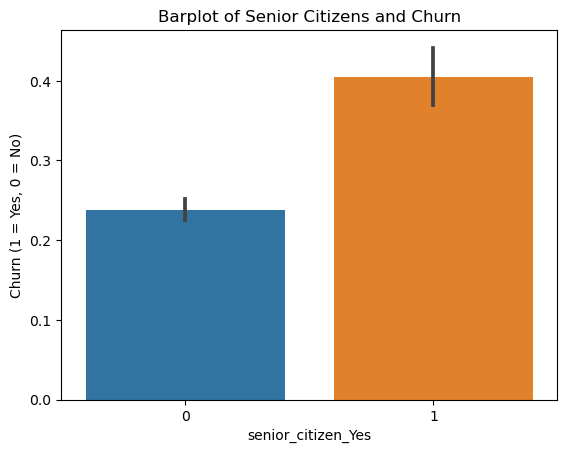

In [10]:
sns.barplot(X_train.senior_citizen_Yes, y_train.churn_Yes, data=df)

# Add labels and title
plt.ylabel('Churn (1 = Yes, 0 = No)')
plt.title('Barplot of Senior Citizens and Churn')

# Show the plot
plt.show()

In [11]:
observed = pd.crosstab(X_train.senior_citizen_Yes, y_train.churn_Yes)
observed

churn_Yes,0,1
senior_citizen_Yes,,
0,2697,844
1,407,277


In [12]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(80.79361466512287,
 2.505662983276272e-19,
 1,
 array([[2601.48260355,  939.51739645],
        [ 502.51739645,  181.48260355]]))

In [13]:
corr, p = stats.pearsonr(X_train.senior_citizen_Yes, y_train.churn_Yes)
corr, p

(0.1390127109165715, 1.113458833105617e-19)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


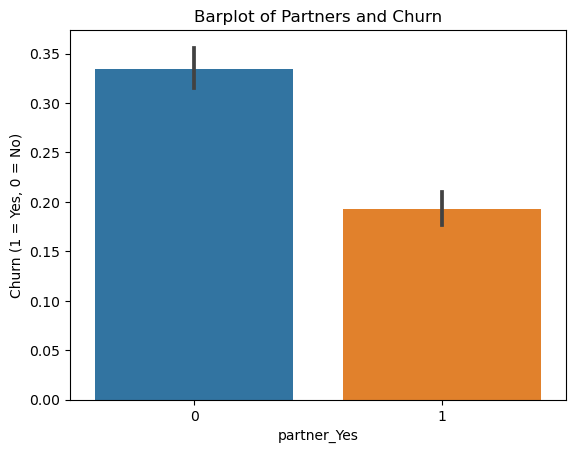

In [14]:
sns.barplot(X_train.partner_Yes, y_train.churn_Yes, data=df)

# Add labels and title
plt.ylabel('Churn (1 = Yes, 0 = No)')
plt.title('Barplot of Partners and Churn')

# Show the plot
plt.show()

In [15]:
observed = pd.crosstab(X_train.partner_Yes, y_train.churn_Yes)
observed

churn_Yes,0,1
partner_Yes,,
0,1439,722
1,1665,399


In [16]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(106.63124069338238,
 5.362120825511991e-25,
 1,
 array([[1587.63171598,  573.36828402],
        [1516.36828402,  547.63171598]]))

In [17]:
corr, p = stats.pearsonr(X_train.partner_Yes, y_train.churn_Yes)
corr, p

(-0.15940146649612144, 1.9116438006458855e-25)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


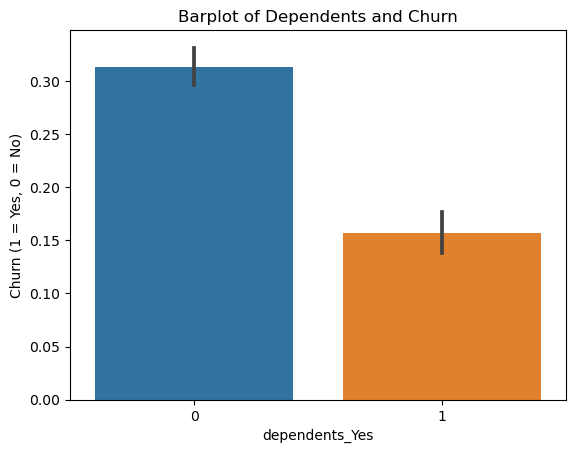

In [18]:
sns.barplot(X_train.dependents_Yes, y_train.churn_Yes)

# Add labels and title
plt.ylabel('Churn (1 = Yes, 0 = No)')
plt.title('Barplot of Dependents and Churn')

# Show the plot
plt.show()

In [19]:
observed = pd.crosstab(X_train.dependents_Yes, y_train.churn_Yes)
observed

churn_Yes,0,1
dependents_Yes,,
0,2013,918
1,1091,203


In [20]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(111.74045071817625,
 4.0728740930257814e-26,
 1,
 array([[2153.33112426,  777.66887574],
        [ 950.66887574,  343.33112426]]))

In [21]:
corr, p = stats.pearsonr(X_train.dependents_Yes, y_train.churn_Yes)
corr, p

(-0.1632082123404583, 1.303375209553967e-26)